<a href="https://colab.research.google.com/github/ZamanbekNuridinov/Salary-prediction/blob/main/Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salary prediction 

In [ ]:
import time
from datetime import datetime
#measure notebook running time
start_time = time.time()

%matplotlib inline

import numpy as np 
from numpy.random import seed
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

# from google.colab import files
# uploaded = files.upload()

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge,LinearRegression,HuberRegressor, SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

#sns.set(rc={'figure.figsize':(10,8)})
sns.set(style='darkgrid', context='notebook', palette='deep', rc={'figure.figsize':(10,8)})

In [ ]:
predict = pd.read_csv("/content/drive/MyDrive/Thesis/salary_predict.csv")
train = pd.read_csv("/content/drive/MyDrive/Thesis/salary_train.csv")

In [ ]:
train.head()

,Id,algebra,programming,data science,robotics,economics,job,salary
0,0,87,62,86,61,90,junior developer,140000
1,1,76,84,76,80,79,data scientist,780000
2,2,56,55,99,82,98,developer,210000
3,3,99,66,65,84,58,economist,420000
4,4,73,87,56,84,73,data scientist,760000


In [ ]:
predict.head()

,Id,algebra,programming,data science,robotics,economics,job,salary
0,9000,73,59,57,54,61,robotics engineer,0
1,9001,77,80,53,93,80,senior developer,0
2,9002,95,72,88,63,84,developer,0
3,9003,83,88,97,75,50,robotics engineer,0
4,9004,52,85,92,87,62,junior developer,0


In [ ]:
train.shape

(9000, 8)

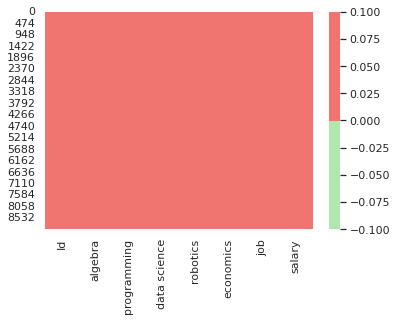

In [ ]:
cols = train.columns[:81] 
colours = ['#B0E7AE','#F07470'] 
sns.heatmap(train[cols].isnull(),cmap = sns.color_palette(colours))

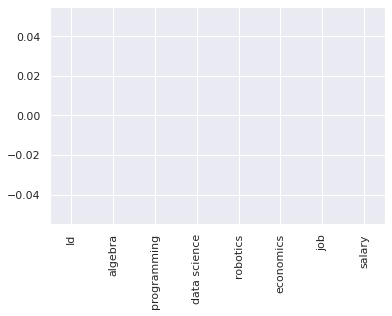

In [ ]:
train[train.columns[train.isna().sum() > -1]].isna().sum().sort_values().plot.bar();  

In [ ]:
for col in train.columns:
    value_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col,round(value_missing*100)))

Id - 0%
algebra - 0%
programming - 0%
data science - 0%
robotics - 0%
economics - 0%
job - 0%
salary - 0%


In [ ]:
train.describe()

,Id,algebra,programming,data science,robotics,economics,salary
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03
mean,4499.500000,74.485556,74.500111,74.349889,74.445444,74.620556,5.197633e+05
std,2598.220545,14.470835,14.489513,14.340312,14.362890,14.402834,2.805051e+05
min,0.000000,50.000000,50.000000,50.000000,50.000000,50.000000,9.000000e+04
25%,2249.750000,62.000000,62.000000,62.000000,62.000000,62.000000,3.000000e+05
50%,4499.500000,74.000000,74.000000,75.000000,74.000000,75.000000,4.600000e+05
75%,6749.250000,87.000000,87.000000,87.000000,87.000000,87.000000,7.600000e+05
max,8999.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.350000e+06


count    9.000000e+03
mean     5.197633e+05
std      2.805051e+05
min      9.000000e+04
25%      3.000000e+05
50%      4.600000e+05
75%      7.600000e+05
max      1.350000e+06
Name: salary, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


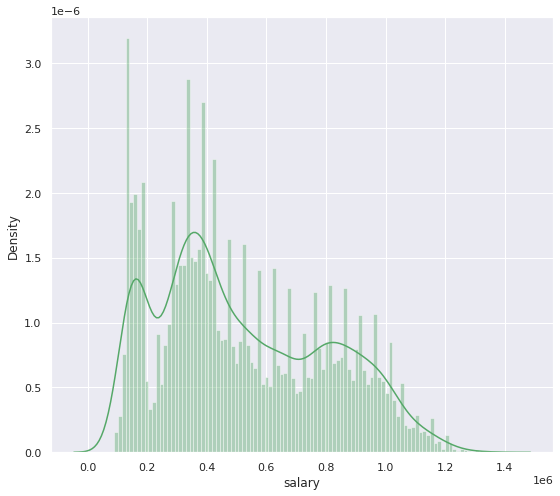

In [ ]:
print(train['salary'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['salary'], color='g', bins=100, hist_kws={'alpha': 0.4});
# Оценка плотности ядра (KDE) — это способ оценки функции плотности вероятности непрерывной случайной величины
# Функция distplot () предоставляет наиболее удобный способ быстро взглянуть на 
# одномерное распределение. Эта функция построит гистограмму, которая соответствует оценке плотности ядра данных.

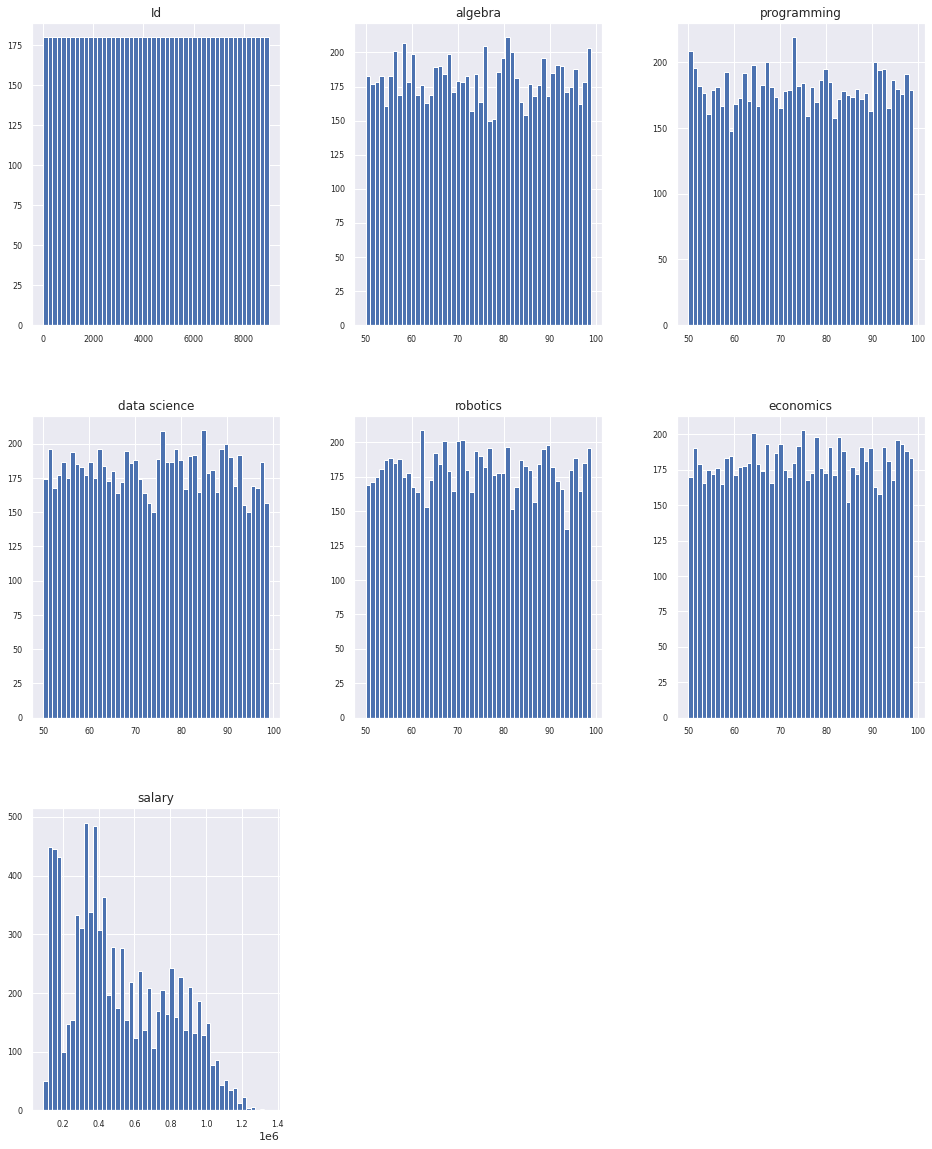

In [ ]:
train_num = train.select_dtypes(include = ['float64', 'int64'])
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [ ]:
train.job.unique()

array(['junior developer', 'data scientist', 'developer', 'economist',
       'robotics engineer', 'senior developer'], dtype=object)

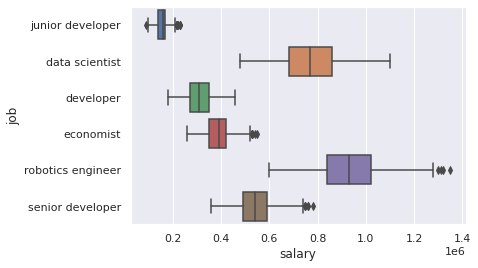

In [ ]:
sns.boxplot(y="job", x="salary", data=train)

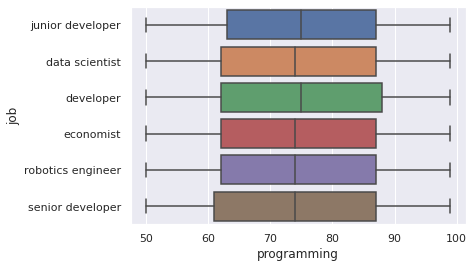

In [ ]:
sns.boxplot(y="job", x="programming", data=train)

In [ ]:
train = train.join(pd.get_dummies(train['job']))
train = train.drop('job',axis = 1)
# Мы делаем очистку от ненужных нам данных и оптимизируем данные для решение нашей задачи

In [ ]:
train.head()

,Id,algebra,programming,data science,robotics,economics,salary,data scientist,developer,economist,junior developer,robotics engineer,senior developer
0,0,87,62,86,61,90,140000,0,0,0,1,0,0
1,1,76,84,76,80,79,780000,1,0,0,0,0,0
2,2,56,55,99,82,98,210000,0,1,0,0,0,0
3,3,99,66,65,84,58,420000,0,0,1,0,0,0
4,4,73,87,56,84,73,760000,1,0,0,0,0,0


In [ ]:
train.describe()

,Id,algebra,programming,data science,robotics,economics,salary,data scientist,developer,economist,junior developer,robotics engineer,senior developer
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4499.500000,74.485556,74.500111,74.349889,74.445444,74.620556,5.197633e+05,0.164222,0.169778,0.166333,0.163000,0.171444,0.165222
std,2598.220545,14.470835,14.489513,14.340312,14.362890,14.402834,2.805051e+05,0.370498,0.375458,0.372400,0.369386,0.376918,0.371402
min,0.000000,50.000000,50.000000,50.000000,50.000000,50.000000,9.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2249.750000,62.000000,62.000000,62.000000,62.000000,62.000000,3.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4499.500000,74.000000,74.000000,75.000000,74.000000,75.000000,4.600000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6749.250000,87.000000,87.000000,87.000000,87.000000,87.000000,7.600000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8999.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.350000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


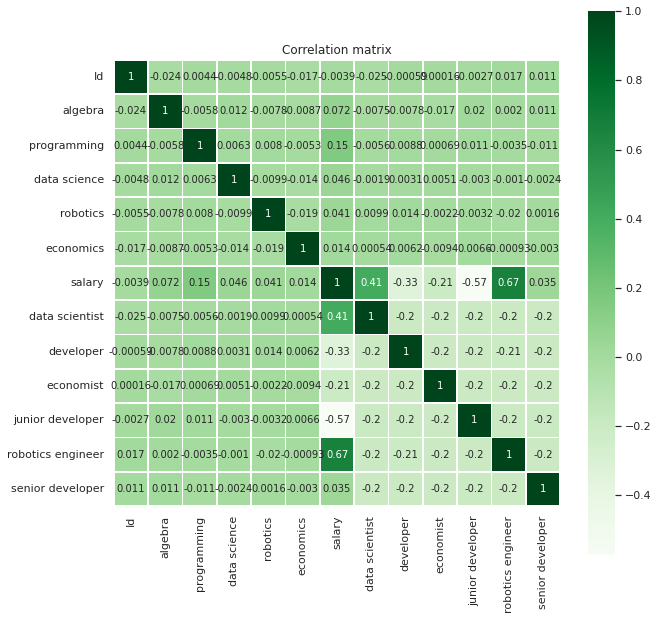

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), square=True, cmap='Greens',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix')
plt.show()

Junior developer

In [ ]:
train_jd = train[train['junior developer'] == 1]
train_jd = train_jd.drop(['economics', 'robotics','data scientist','developer','economist','robotics engineer','senior developer'], axis=1)
# Обратите внимание на то, что для разных должностей имеют значения оценки по разным предметам. Например, для финансового аудитора 
# программирование не так важно, как бухгалтерия. Данное наблюдение вам очень сильно поможет в работе.

In [ ]:
train_jd.head()

,Id,algebra,programming,data science,salary,junior developer
0,0,87,62,86,140000,1
22,22,50,72,68,120000,1
25,25,72,98,91,170000,1
37,37,68,55,66,120000,1
43,43,83,85,93,190000,1


Data scientist

In [ ]:
train_ds = train[train['data scientist'] == 1]
train_ds = train_ds.drop(['economics', 'robotics','junior developer','developer','economist','robotics engineer','senior developer'], axis=1)

In [ ]:
train_ds.head()

,Id,algebra,programming,data science,salary,data scientist
1,1,76,84,76,780000,1
4,4,73,87,56,760000,1
10,10,90,61,69,710000,1
12,12,66,77,60,780000,1
17,17,55,74,71,790000,1


Developer

In [ ]:
train_d = train[train['developer'] == 1]
train_d = train_d.drop(['economics', 'robotics','junior developer','data scientist','economist','robotics engineer','senior developer'], axis=1)

In [ ]:
train_d.head()

,Id,algebra,programming,data science,salary,developer
2,2,56,55,99,210000,1
8,8,91,95,99,380000,1
9,9,98,93,66,350000,1
11,11,58,99,99,380000,1
14,14,64,97,98,310000,1


Economist

In [ ]:
train_e = train[train['economist'] == 1]
train_e = train_e.drop(['programming', 'data science','robotics','data scientist','developer','junior developer','robotics engineer','senior developer'], axis=1)

In [ ]:
train_e.head()

,Id,algebra,economics,salary,economist
3,3,99,58,420000,1
7,7,79,94,450000,1
15,15,99,86,420000,1
16,16,55,87,430000,1
26,26,69,92,420000,1


Robotics engineer

In [ ]:
train_re = train[train['robotics engineer'] == 1]
train_re = train_re.drop(['algebra', 'data science','economics','data scientist','developer','junior developer','economist','senior developer'], axis=1)

In [ ]:
train_re.head()

,Id,programming,robotics,salary,robotics engineer
5,5,91,63,790000,1
20,20,97,61,990000,1
24,24,52,83,830000,1
44,44,86,62,970000,1
54,54,78,54,750000,1


Senior developer

In [ ]:
train_sd = train[train['senior developer'] == 1]
train_sd = train_sd.drop(['economics', 'robotics','data scientist','developer','economist','robotics engineer','junior developer'], axis=1)

In [ ]:
train_sd.head()

,Id,algebra,programming,data science,salary,senior developer
6,6,73,56,82,510000,1
13,13,70,80,55,560000,1
21,21,94,59,63,510000,1
28,28,99,61,63,540000,1
29,29,67,86,73,500000,1


**Variables for Model**

Junior developer

In [ ]:
y_jd = train_jd.salary
X_jd = train_jd.drop(['salary','Id','junior developer'], axis=1)
X_train_jd, X_test_jd, y_train_jd, y_test_jd = train_test_split(X_jd,y_jd, test_size = 0.3, random_state = 13)

Data scientist

In [ ]:
y_ds = train_ds.salary
X_ds = train_ds.drop(['salary','Id','data scientist'], axis=1)
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_ds,y_ds, test_size = 0.3, random_state = 13)

Developer

In [ ]:
y_d = train_d.salary
X_d = train_d.drop(['salary','Id','developer'], axis=1)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d,y_d, test_size = 0.3, random_state = 13)

Economist

In [ ]:
y_e = train_e.salary
X_e = train_e.drop(['salary','Id','economist'], axis=1)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_e,y_e, test_size = 0.3, random_state = 13)

Robotics engineer

In [ ]:
y_re = train_re.salary
X_re = train_re.drop(['salary','Id','robotics engineer'], axis=1)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re,y_re, test_size = 0.3, random_state = 13)

Senior Developer

In [ ]:
y_sd = train_sd.salary
X_sd = train_sd.drop(['salary','Id','senior developer'], axis=1)
X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(X_sd,y_sd, test_size = 0.3, random_state = 13)

In [ ]:
print(X_train_sd)
print(y_train_sd)
print('/////////////////////')
print(X_sd)
print(y_sd)
print('/////////////////////')
print(X_test_sd)
print(y_test_sd)
print('/////////////////////')
X_train_sd.loc[X_train_sd['algebra'] == 73]

      algebra  programming  data science
2527       91           50            94
2992       59           70            59
6375       89           50            76
5073       82           58            89
590        90           85            85
...       ...          ...           ...
5299       84           99            95
4488       52           72            52
481        75           80            89
1138       77           93            70
2090       78           81            99

[1040 rows x 3 columns]
2527    470000
2992    520000
6375    470000
5073    550000
590     590000
         ...  
5299    750000
4488    480000
481     620000
1138    570000
2090    660000
Name: salary, Length: 1040, dtype: int64
/////////////////////
      algebra  programming  data science
6          73           56            82
13         70           80            55
21         94           59            63
28         99           61            63
29         67           86            73
...      

,algebra,programming,data science
5590,73,64,67
1114,73,50,85
3536,73,61,68
5246,73,58,99
4330,73,50,95
8762,73,76,85
3032,73,70,90
6502,73,57,56
7750,73,73,85
3814,73,94,61


In [ ]:
X_test_sd.loc[X_test_sd['algebra'] == 73]

,algebra,programming,data science
6938,73,51,75
6947,73,62,91
8392,73,61,58
3426,73,97,85
5038,73,71,67
4566,73,98,92
6,73,56,82
3465,73,79,71
6421,73,77,90


# **Models**

## **Random Forest model**

Junior Developer

In [ ]:
%%time
RF_model_jd = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13).fit(X_train_jd,y_train_jd)

CPU times: user 1.77 s, sys: 72.1 ms, total: 1.84 s
Wall time: 1.92 s


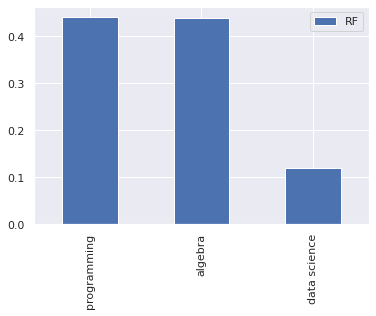

In [ ]:
features = {}
for feature, importance in zip(X_train_jd.columns, RF_model_jd.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"RF":features})
importances.sort_values("RF", ascending = False, inplace=True)
importances[:3].plot.bar();

Data Scientist

In [ ]:
%%time
RF_model_ds = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13).fit(X_train_ds,y_train_ds)

CPU times: user 1.62 s, sys: 134 ms, total: 1.76 s
Wall time: 1.31 s


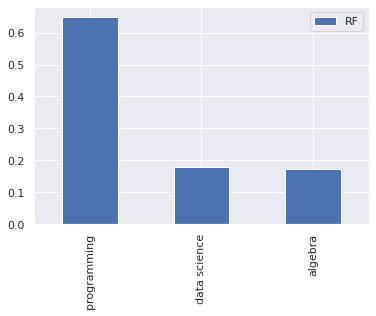

In [ ]:
features = {}
for feature, importance in zip(X_train_ds.columns, RF_model_ds.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"RF":features})
importances.sort_values("RF", ascending = False, inplace=True)
importances[:3].plot.bar();

Developer

In [ ]:
%%time
RF_model_d = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13).fit(X_train_d,y_train_d)

CPU times: user 1.53 s, sys: 161 ms, total: 1.69 s
Wall time: 1.2 s


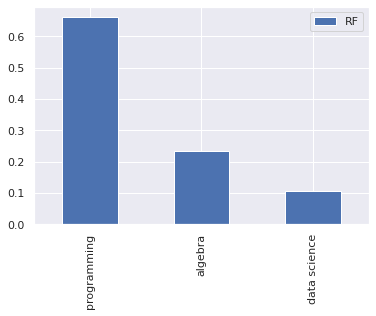

In [ ]:
features = {}
for feature, importance in zip(X_train_d.columns, RF_model_d.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"RF":features})
importances.sort_values("RF", ascending = False, inplace=True)
importances[:3].plot.bar();

Economist

In [ ]:
%%time
RF_model_e = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13).fit(X_train_e,y_train_e)

CPU times: user 1.29 s, sys: 169 ms, total: 1.46 s
Wall time: 1.11 s


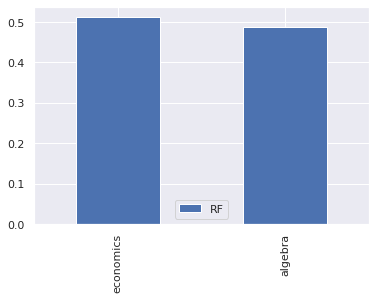

In [ ]:
features = {}
for feature, importance in zip(X_train_e.columns, RF_model_e.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"RF":features})
importances.sort_values("RF", ascending = False, inplace=True)
importances[:3].plot.bar();

Robotics engineer

In [ ]:
%%time
RF_model_re = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13).fit(X_train_re,y_train_re)

CPU times: user 1.3 s, sys: 158 ms, total: 1.46 s
Wall time: 1.09 s


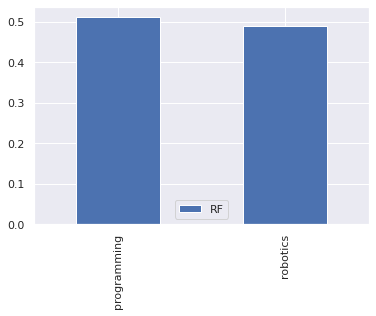

In [ ]:
features = {}
for feature, importance in zip(X_train_re.columns, RF_model_re.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"RF":features})
importances.sort_values("RF", ascending = False, inplace=True)
importances[:3].plot.bar();

Senior developer

In [ ]:
%%time
RF_model_sd = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13).fit(X_train_sd,y_train_sd)

CPU times: user 1.62 s, sys: 161 ms, total: 1.78 s
Wall time: 1.28 s


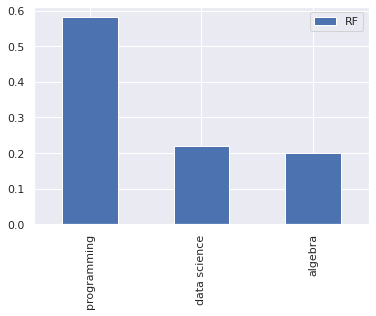

In [ ]:
features = {}
for feature, importance in zip(X_train_sd.columns, RF_model_sd.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"RF":features})
importances.sort_values("RF", ascending = False, inplace=True)
importances[:3].plot.bar();

Scores

In [ ]:
print("Random Forest for Jenior developer:")
print("train_score:", RF_model_jd.score(X_train_jd,y_train_jd))
print("test_score:", RF_model_jd.score(X_test_jd,y_test_jd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_jd),np.log(RF_model_jd.predict(X_train_jd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_jd),np.log(RF_model_jd.predict(X_test_jd)))))
print("------------------------------")
print("Random Forest for Data scientist:")
print("train_score:", RF_model_ds.score(X_train_ds,y_train_ds))
print("test_score:", RF_model_ds.score(X_test_ds,y_test_ds))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_ds),np.log(RF_model_ds.predict(X_train_ds)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_ds),np.log(RF_model_ds.predict(X_test_ds)))))
print("------------------------------")
print("Random Forest for Developer:")
print("train_score:", RF_model_d.score(X_train_d,y_train_d))
print("test_score:", RF_model_d.score(X_test_d,y_test_d))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_d),np.log(RF_model_d.predict(X_train_d)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_d),np.log(RF_model_d.predict(X_test_d)))))
print("------------------------------")
print("Random Forest for Economist:")
print("train_score:", RF_model_e.score(X_train_e,y_train_e))
print("test_score:", RF_model_e.score(X_test_e,y_test_e))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_e),np.log(RF_model_e.predict(X_train_e)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_e),np.log(RF_model_e.predict(X_test_e)))))
print("------------------------------")
print("Random Forest for Robotics engineer:")
print("train_score:", RF_model_re.score(X_train_re,y_train_re))
print("test_score:", RF_model_re.score(X_test_re,y_test_re))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_re),np.log(RF_model_re.predict(X_train_re)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_re),np.log(RF_model_re.predict(X_test_re)))))
print("------------------------------")
print("Random Forest for Senior developer:")
print("train_score:", RF_model_sd.score(X_train_sd,y_train_sd))
print("test_score:", RF_model_sd.score(X_test_sd,y_test_sd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_sd),np.log(RF_model_sd.predict(X_train_sd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_sd),np.log(RF_model_sd.predict(X_test_sd)))))

Random Forest for Jenior developer:
train_score: 0.948822230974483
test_score: 0.646411803291344
train RMSE: 0.035327010474548066
test RMSE: 0.09109817603849828
------------------------------
Random Forest for Data scientist:
train_score: 0.9504848000490654
test_score: 0.6497183429303435
train RMSE: 0.03396034432274921
test RMSE: 0.09143984706939959
------------------------------
Random Forest for Developer:
train_score: 0.958669209604737
test_score: 0.7149401671764447
train RMSE: 0.0340099063689721
test RMSE: 0.09081632178804022
------------------------------
Random Forest for Economist:
train_score: 0.8757083549119389
test_score: 0.4066438954493887
train RMSE: 0.048916457435293735
test RMSE: 0.10468343281448482
------------------------------
Random Forest for Robotics engineer:
train_score: 0.8782349812239476
test_score: 0.44240770144456787
train RMSE: 0.04833374618135772
test RMSE: 0.10486679024519864
------------------------------
Random Forest for Senior developer:
train_score: 0.

In [ ]:
predict.head()

,Id,algebra,programming,data science,robotics,economics,job,salary
0,9000,73,59,57,54,61,robotics engineer,0
1,9001,77,80,53,93,80,senior developer,0
2,9002,95,72,88,63,84,developer,0
3,9003,83,88,97,75,50,robotics engineer,0
4,9004,52,85,92,87,62,junior developer,0


### Observe train prediction for Random Forest model

In [ ]:
%%time
y_rf_jd = RF_model_jd.predict(X_jd)
y_rf_ds = RF_model_ds.predict(X_ds)
y_rf_d = RF_model_d.predict(X_d)
y_rf_e = RF_model_e.predict(X_e)
y_rf_re = RF_model_re.predict(X_re)
y_rf_sd = RF_model_sd.predict(X_sd)

CPU times: user 1.19 s, sys: 190 ms, total: 1.38 s
Wall time: 1.22 s


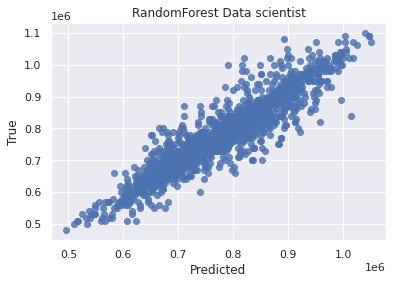

In [ ]:
plt.scatter(y_rf_ds, y_ds, alpha = 0.8);
plt.title("RandomForest Data scientist")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();

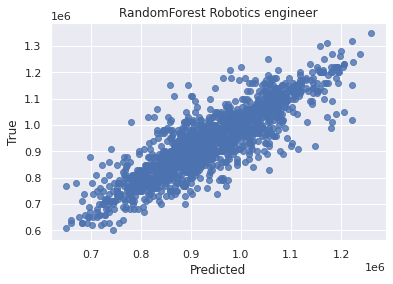

In [ ]:
plt.scatter(y_rf_re, y_re, alpha = 0.8);
plt.title("RandomForest Robotics engineer")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();

## **Ridge model**

Junior Developer

In [ ]:
ridge_model_jd = Ridge(alpha=10, random_state=13).fit(X_train_jd,y_train_jd)

Data scientist

In [ ]:
ridge_model_ds = Ridge(alpha=10, random_state=13).fit(X_train_ds,y_train_ds)

Developer

In [ ]:
ridge_model_d = Ridge(alpha=10, random_state=13).fit(X_train_d,y_train_d)

Economist

In [ ]:
ridge_model_e = Ridge(alpha=10, random_state=13).fit(X_train_e,y_train_e)

Robotics engineer

In [ ]:
ridge_model_re = Ridge(alpha=10, random_state=13).fit(X_train_re,y_train_re)

Senior developer

In [ ]:
ridge_model_sd = Ridge(alpha=10, random_state=13).fit(X_train_sd,y_train_sd)

**Scores**

In [ ]:
print("Ridge for Junior developer:")
print("train_score:", ridge_model_jd.score(X_train_jd,y_train_jd))
print("test_score:", ridge_model_jd.score(X_test_jd,y_test_jd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_jd),np.log(ridge_model_jd.predict(X_train_jd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_jd),np.log(ridge_model_jd.predict(X_test_jd)))))
print("------------------------------")
print("Ridge for Data scientist:")
print("train_score:", ridge_model_ds.score(X_train_ds,y_train_ds))
print("test_score:", ridge_model_ds.score(X_test_ds,y_test_ds))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_ds),np.log(ridge_model_ds.predict(X_train_ds)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_ds),np.log(ridge_model_ds.predict(X_test_ds)))))
print("------------------------------")
print("Ridge for Developer:")
print("train_score:", ridge_model_d.score(X_train_d,y_train_d))
print("test_score:", ridge_model_d.score(X_test_d,y_test_d))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_d),np.log(ridge_model_d.predict(X_train_d)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_d),np.log(ridge_model_d.predict(X_test_d)))))
print("------------------------------")
print("Ridge for Economist:")
print("train_score:", ridge_model_e.score(X_train_e,y_train_e))
print("test_score:", ridge_model_e.score(X_test_e,y_test_e))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_e),np.log(ridge_model_e.predict(X_train_e)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_e),np.log(ridge_model_e.predict(X_test_e)))))
print("------------------------------")
print("Ridge for Robotics engineer:")
print("train_score:", ridge_model_re.score(X_train_re,y_train_re))
print("test_score:", ridge_model_re.score(X_test_re,y_test_re))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_re),np.log(ridge_model_re.predict(X_train_re)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_re),np.log(ridge_model_re.predict(X_test_re)))))
print("------------------------------")
print("Ridge for Senior developer:")
print("train_score:", ridge_model_sd.score(X_train_sd,y_train_sd))
print("test_score:", ridge_model_sd.score(X_test_sd,y_test_sd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_sd),np.log(ridge_model_sd.predict(X_train_sd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_sd),np.log(ridge_model_sd.predict(X_test_sd)))))

Ridge for Junior developer:
train_score: 0.7060846638842534
test_score: 0.7009891581026908
train RMSE: 0.08486626589465013
test RMSE: 0.08424456034484425
------------------------------
Ridge for Data scientist:
train_score: 0.6953666473831632
test_score: 0.7098585641092898
train RMSE: 0.08404904615746744
test RMSE: 0.08344962736713912
------------------------------
Ridge for Developer:
train_score: 0.7532257842049203
test_score: 0.7568437843159866
train RMSE: 0.0826064083978037
test RMSE: 0.08294932665002477
------------------------------
Ridge for Economist:
train_score: 0.5627532542220428
test_score: 0.553465626067984
train RMSE: 0.0907904378968873
test RMSE: 0.09024596938303403
------------------------------
Ridge for Robotics engineer:
train_score: 0.572348913202188
test_score: 0.5695458583530979
train RMSE: 0.08977636074919498
test RMSE: 0.09285639640790432
------------------------------
Ridge for Senior developer:
train_score: 0.5711351428691867
test_score: 0.6099654159776877
tra

### Observe train prediction for Ridge model

In [ ]:
%%time
y_ridge_jd = ridge_model_jd.predict(X_jd)
y_ridge_ds = ridge_model_ds.predict(X_ds)
y_ridge_d = ridge_model_d.predict(X_d)
y_ridge_e = ridge_model_e.predict(X_e)
y_ridge_re = ridge_model_re.predict(X_re)
y_ridge_sd = ridge_model_sd.predict(X_sd)

CPU times: user 8.94 ms, sys: 1.1 ms, total: 10 ms
Wall time: 11.7 ms


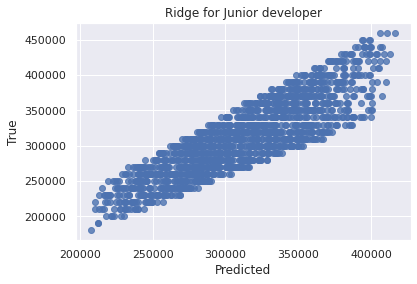

In [ ]:
plt.scatter(y_ridge_d, y_d, alpha = 0.8);
plt.title("Ridge for Junior developer")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();

## **Lasso model**

Junior developer

In [ ]:
lasso_model_jd = Lasso(alpha=100, max_iter=10000, random_state=13).fit(X_train_jd,y_train_jd)

Data scientist

In [ ]:
lasso_model_ds = Lasso(alpha=100, max_iter=10000, random_state=13).fit(X_train_ds,y_train_ds)

Developer

In [ ]:
lasso_model_d = Lasso(alpha=100, max_iter=10000, random_state=13).fit(X_train_d,y_train_d)

Economist

In [ ]:
lasso_model_e = Lasso(alpha=100, max_iter=10000, random_state=13).fit(X_train_e,y_train_e)

Robotics engineer

In [ ]:
lasso_model_re = Lasso(alpha=100, max_iter=10000, random_state=13).fit(X_train_re,y_train_re)

Senior developer

In [ ]:
lasso_model_sd = Lasso(alpha=100, max_iter=10000, random_state=13).fit(X_train_sd,y_train_sd)

**Scores**

In [ ]:
print("Lasso for Junior developer:")
print("train_score:", lasso_model_jd.score(X_train_jd,y_train_jd))
print("test_score:", lasso_model_jd.score(X_test_jd,y_test_jd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_jd),np.log(lasso_model_jd.predict(X_train_jd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_jd),np.log(lasso_model_jd.predict(X_test_jd)))))
print("------------------------------")
print("Lasso for Data scientist:")
print("train_score:", lasso_model_ds.score(X_train_ds,y_train_ds))
print("test_score:", lasso_model_ds.score(X_test_ds,y_test_ds))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_ds),np.log(lasso_model_ds.predict(X_train_ds)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_ds),np.log(lasso_model_ds.predict(X_test_ds)))))
print("------------------------------")
print("Lasso for Developer:")
print("train_score:", lasso_model_d.score(X_train_d,y_train_d))
print("test_score:", lasso_model_d.score(X_test_d,y_test_d))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_d),np.log(lasso_model_d.predict(X_train_d)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_d),np.log(lasso_model_d.predict(X_test_d)))))
print("------------------------------")
print("Lasso for Economist:")
print("train_score:", lasso_model_e.score(X_train_e,y_train_e))
print("test_score:", lasso_model_e.score(X_test_e,y_test_e))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_e),np.log(lasso_model_e.predict(X_train_e)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_e),np.log(lasso_model_e.predict(X_test_e)))))
print("------------------------------")
print("Lasso for Robotics engineer:")
print("train_score:", lasso_model_re.score(X_train_re,y_train_re))
print("test_score:", lasso_model_re.score(X_test_re,y_test_re))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_re),np.log(lasso_model_re.predict(X_train_re)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_re),np.log(lasso_model_re.predict(X_test_re)))))
print("------------------------------")
print("Lasso for Senior developer:")
print("train_score:", lasso_model_sd.score(X_train_sd,y_train_sd))
print("test_score:", lasso_model_sd.score(X_test_sd,y_test_sd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_sd),np.log(lasso_model_sd.predict(X_train_sd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_sd),np.log(lasso_model_sd.predict(X_test_sd)))))
print("------------------------------")

Lasso for Junior developer:
train_score: 0.7060844230050498
test_score: 0.7009703935835468
train RMSE: 0.08486655973570098
test RMSE: 0.08424730406319447
------------------------------
Lasso for Data scientist:
train_score: 0.6953666385975583
test_score: 0.7098565195593092
train RMSE: 0.08404910812312559
test RMSE: 0.0834500912849993
------------------------------
Lasso for Developer:
train_score: 0.753225732699531
test_score: 0.7568447650150254
train RMSE: 0.08260576633138518
test RMSE: 0.08294950832297303
------------------------------
Lasso for Economist:
train_score: 0.5627532227266937
test_score: 0.5534606623327585
train RMSE: 0.09079053014409051
test RMSE: 0.0902464915577682
------------------------------
Lasso for Robotics engineer:
train_score: 0.5723489082848663
test_score: 0.5695441573876985
train RMSE: 0.08977635629856728
test RMSE: 0.0928567298304969
------------------------------
Lasso for Senior developer:
train_score: 0.5711351178116638
test_score: 0.6099556866046669
tra

### Observe train prediction for Lasso model

In [ ]:
%%time
y_lasso_jd = lasso_model_jd.predict(X_jd)
y_lasso_ds = lasso_model_ds.predict(X_ds)
y_lasso_d = lasso_model_d.predict(X_d)
y_lasso_e = lasso_model_e.predict(X_e)
y_lasso_re = lasso_model_re.predict(X_re)
y_lasso_sd = lasso_model_sd.predict(X_sd)

CPU times: user 10.8 ms, sys: 32 µs, total: 10.8 ms
Wall time: 11.9 ms


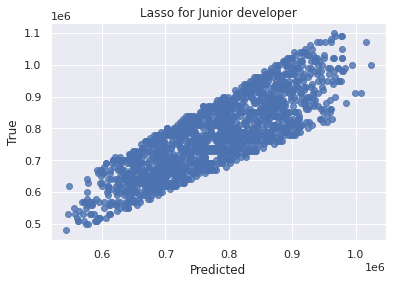

In [ ]:
plt.scatter(y_lasso_ds, y_ds, alpha = 0.8);
plt.title("Lasso for Junior developer")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();

## **Elastic Net model**

Junior developer

In [ ]:
elastic_model_jd= ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000, random_state=13).fit(X_train_jd,y_train_jd)

Data scientist

In [ ]:
elastic_model_ds= ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000, random_state=13).fit(X_train_ds,y_train_ds)

Developer

In [ ]:
elastic_model_d= ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000, random_state=13).fit(X_train_d,y_train_d)

Economist

In [ ]:
elastic_model_e= ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000, random_state=13).fit(X_train_e,y_train_e)

Robotics engineer

In [ ]:
elastic_model_re= ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000, random_state=13).fit(X_train_re,y_train_re)

Senior developer

In [ ]:
elastic_model_sd= ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000, random_state=13).fit(X_train_sd,y_train_sd)

Scores

In [ ]:
print("ElasticNet for Junior developer:")
print("train_score:", elastic_model_jd.score(X_train_jd,y_train_jd))
print("test_score:", elastic_model_jd.score(X_test_jd,y_test_jd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_jd),np.log(elastic_model_jd.predict(X_train_jd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_jd),np.log(elastic_model_jd.predict(X_test_jd)))))
print("------------------------------")
print("ElasticNet for Data scientist:")
print("train_score:", elastic_model_ds.score(X_train_ds,y_train_ds))
print("test_score:", elastic_model_ds.score(X_test_ds,y_test_ds))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_ds),np.log(elastic_model_ds.predict(X_train_ds)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_ds),np.log(elastic_model_ds.predict(X_test_ds)))))
print("------------------------------")
print("ElasticNet for Developer:")
print("train_score:", elastic_model_d.score(X_train_d,y_train_d))
print("test_score:", elastic_model_d.score(X_test_d,y_test_d))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_d),np.log(elastic_model_d.predict(X_train_d)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_d),np.log(elastic_model_d.predict(X_test_d)))))
print("------------------------------")
print("ElasticNet for Economist:")
print("train_score:", elastic_model_e.score(X_train_e,y_train_e))
print("test_score:", elastic_model_e.score(X_test_e,y_test_e))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_e),np.log(elastic_model_e.predict(X_train_e)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_e),np.log(elastic_model_e.predict(X_test_e)))))
print("------------------------------")
print("ElasticNet for Robotics engineer:")
print("train_score:", elastic_model_re.score(X_train_re,y_train_re))
print("test_score:", elastic_model_re.score(X_test_re,y_test_re))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_re),np.log(elastic_model_re.predict(X_train_re)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_re),np.log(elastic_model_re.predict(X_test_re)))))
print("------------------------------")
print("ElasticNet for Senior developer:")
print("train_score:", elastic_model_sd.score(X_train_sd,y_train_sd))
print("test_score:", elastic_model_sd.score(X_test_sd,y_test_sd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_sd),np.log(elastic_model_sd.predict(X_train_sd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_sd),np.log(elastic_model_sd.predict(X_test_sd)))))

ElasticNet for Junior developer:
train_score: 0.7060846637697583
test_score: 0.7009891364801903
train RMSE: 0.08486626666723295
test RMSE: 0.08424456498581569
------------------------------
ElasticNet for Data scientist:
train_score: 0.6953666472730898
test_score: 0.709858455067481
train RMSE: 0.08404904773052192
test RMSE: 0.08344964558632943
------------------------------
ElasticNet for Developer:
train_score: 0.7532257839669869
test_score: 0.7568437712932867
train RMSE: 0.08260639683551502
test RMSE: 0.08294933716160796
------------------------------
ElasticNet for Economist:
train_score: 0.5627532541093205
test_score: 0.5534655783678568
train RMSE: 0.0907904388939275
test RMSE: 0.0902459744105784
------------------------------
ElasticNet for Robotics engineer:
train_score: 0.5723489129997339
test_score: 0.5695457441978988
train RMSE: 0.08977636039827368
test RMSE: 0.09285641825229737
------------------------------
ElasticNet for Senior developer:
train_score: 0.5711351427614333
tes

## **XGBoost model**

Junior Developer

In [ ]:
xg_model_jd = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, seed = 13, subsample = 0.8, learning_rate = 0.1, reg_alpha=0.01, reg_lambda = 10).fit(X_train_jd,y_train_jd)

Data scientist

In [ ]:
xg_model_ds = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, seed = 13, subsample = 0.8, learning_rate = 0.1, reg_alpha=0.01, reg_lambda = 10).fit(X_train_ds,y_train_ds)

Developer

In [ ]:
xg_model_d = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, seed = 13, subsample = 0.8, learning_rate = 0.1, reg_alpha=0.01, reg_lambda = 10).fit(X_train_d,y_train_d)

Economist

In [ ]:
xg_model_e = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, seed = 13, subsample = 0.8, learning_rate = 0.1, reg_alpha=0.01, reg_lambda = 10).fit(X_train_e,y_train_e)

Robotics engineer

In [ ]:
xg_model_re = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, seed = 13, subsample = 0.8, learning_rate = 0.1, reg_alpha=0.01, reg_lambda = 10).fit(X_train_re,y_train_re)

Senior Developer

In [ ]:
xg_model_sd = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, seed = 13, subsample = 0.8, learning_rate = 0.1, reg_alpha=0.01, reg_lambda = 10).fit(X_train_sd,y_train_sd)

Scores

In [ ]:
print("XGB for Junior developer:")
print("train_score:", xg_model_jd.score(X_train_jd,y_train_jd))
print("test_score:", xg_model_jd.score(X_test_jd,y_test_jd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_jd),np.log(xg_model_jd.predict(X_train_jd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_jd),np.log(xg_model_jd.predict(X_test_jd)))))
print("------------------------------")
print("XGB for Data scientist:")
print("train_score:", xg_model_ds.score(X_train_ds,y_train_ds))
print("test_score:", xg_model_ds.score(X_test_ds,y_test_ds))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_ds),np.log(xg_model_ds.predict(X_train_ds)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_ds),np.log(xg_model_ds.predict(X_test_ds)))))
print("------------------------------")
print("XGB for Developer:")
print("train_score:", xg_model_d.score(X_train_d,y_train_d))
print("test_score:", xg_model_d.score(X_test_d,y_test_d))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_d),np.log(xg_model_d.predict(X_train_d)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_d),np.log(xg_model_d.predict(X_test_d)))))
print("------------------------------")
print("XGB for Economist:")
print("train_score:", xg_model_e.score(X_train_e,y_train_e))
print("test_score:", xg_model_e.score(X_test_e,y_test_e))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_e),np.log(xg_model_e.predict(X_train_e)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_e),np.log(xg_model_e.predict(X_test_e)))))
print("------------------------------")
print("XGB for Robotics engineer:")
print("train_score:", xg_model_re.score(X_train_re,y_train_re))
print("test_score:", xg_model_re.score(X_test_re,y_test_re))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_re),np.log(xg_model_re.predict(X_train_re)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_re),np.log(xg_model_re.predict(X_test_re)))))
print("------------------------------")
print("XGB for Senior developer:")
print("train_score:", xg_model_sd.score(X_train_sd,y_train_sd))
print("test_score:", xg_model_sd.score(X_test_sd,y_test_sd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_sd),np.log(xg_model_sd.predict(X_train_sd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_sd),np.log(xg_model_sd.predict(X_test_sd)))))

XGB for Junior developer:
train_score: 0.8269063573492733
test_score: 0.6568575844872193
train RMSE: 0.06544129946047655
test RMSE: 0.08940098321694528
------------------------------
XGB for Data scientist:
train_score: 0.8319007110172812
test_score: 0.6422861949824781
train RMSE: 0.06315867069040235
test RMSE: 0.09221483059371652
------------------------------
XGB for Developer:
train_score: 0.8583470244788939
test_score: 0.7065023446374273
train RMSE: 0.06372654726086059
test RMSE: 0.09150742669943605
------------------------------
XGB for Economist:
train_score: 0.6788253343426176
test_score: 0.4950260110838125
train RMSE: 0.07793180893599519
test RMSE: 0.09599147961143187
------------------------------
XGB for Robotics engineer:
train_score: 0.6988918445381305
test_score: 0.5127729998858415
train RMSE: 0.07597111322552876
test RMSE: 0.09786588693332156
------------------------------
XGB for Senior developer:
train_score: 0.7512572458937277
test_score: 0.5091818176264193
train RMSE:

## **ADA Boost model**

Junior developer

In [ ]:
ada_model_jd = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=1, n_estimators=500,
                  random_state=13).fit(X_train_jd,y_train_jd)

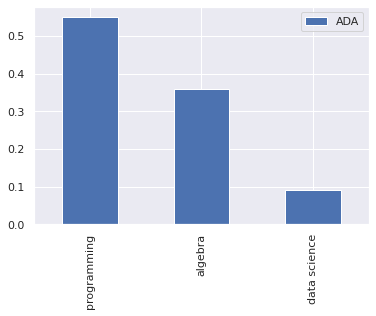

In [ ]:
features = {}
for feature, importance in zip(X_train_jd.columns, ada_model_jd.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"ADA":features})
importances.sort_values("ADA", ascending = False, inplace=True)
importances[:4].plot.bar();

Data scientist

In [ ]:
ada_model_ds = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=1, n_estimators=500,
                  random_state=13).fit(X_train_ds,y_train_ds)

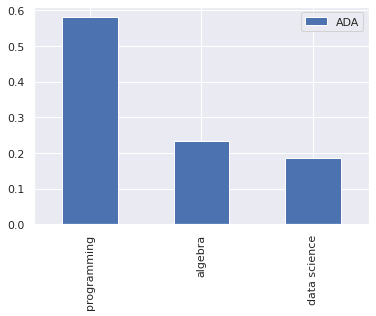

In [ ]:
features = {}
for feature, importance in zip(X_train_ds.columns, ada_model_ds.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"ADA":features})
importances.sort_values("ADA", ascending = False, inplace=True)
importances[:4].plot.bar();

Developer

In [ ]:
ada_model_d = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=1, n_estimators=500,
                  random_state=13).fit(X_train_d,y_train_d)

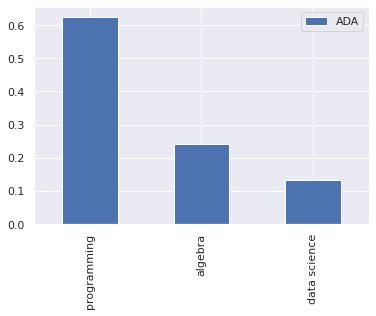

In [ ]:
features = {}
for feature, importance in zip(X_train_d.columns, ada_model_d.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"ADA":features})
importances.sort_values("ADA", ascending = False, inplace=True)
importances[:4].plot.bar();

Economist

In [ ]:
ada_model_e = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=1, n_estimators=500,
                  random_state=13).fit(X_train_e,y_train_e)

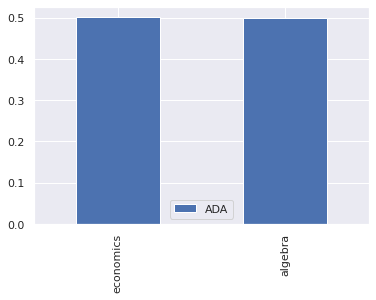

In [ ]:
features = {}
for feature, importance in zip(X_train_e.columns, ada_model_e.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"ADA":features})
importances.sort_values("ADA", ascending = False, inplace=True)
importances[:4].plot.bar();

Robotics engineer

In [ ]:
ada_model_re = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=1, n_estimators=500,
                  random_state=13).fit(X_train_re,y_train_re)

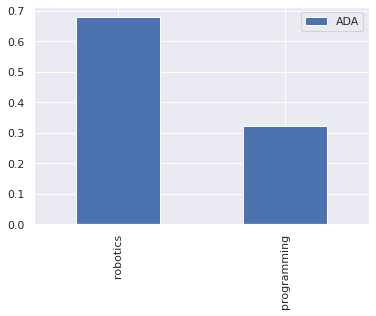

In [ ]:
features = {}
for feature, importance in zip(X_train_re.columns, ada_model_re.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"ADA":features})
importances.sort_values("ADA", ascending = False, inplace=True)
importances[:4].plot.bar();

Senior developer

In [ ]:
ada_model_sd = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=1, n_estimators=500,
                  random_state=13).fit(X_train_sd,y_train_sd)

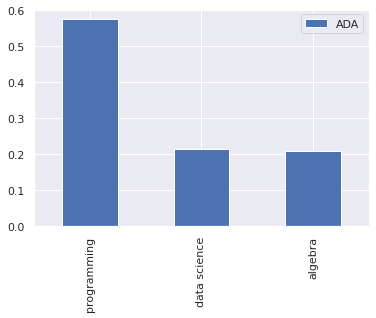

In [ ]:
features = {}
for feature, importance in zip(X_train_sd.columns, ada_model_sd.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"ADA":features})
importances.sort_values("ADA", ascending = False, inplace=True)
importances[:4].plot.bar();

Scores

In [ ]:
print("ADA for Junior developer:")
print("train_score:", ada_model_jd.score(X_train_jd,y_train_jd))
print("test_score:", ada_model_jd.score(X_test_jd,y_test_jd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_jd),np.log(ada_model_jd.predict(X_train_jd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_jd),np.log(ada_model_jd.predict(X_test_jd)))))
print("------------------------------")
print("ADA for Data scientist:")
print("train_score:", ada_model_ds.score(X_train_ds,y_train_ds))
print("test_score:", ada_model_ds.score(X_test_ds,y_test_ds))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_ds),np.log(ada_model_ds.predict(X_train_ds)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_ds),np.log(ada_model_ds.predict(X_test_ds)))))
print("------------------------------")
print("ADA for Developer:")
print("train_score:", ada_model_d.score(X_train_d,y_train_d))
print("test_score:", ada_model_d.score(X_test_d,y_test_d))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_d),np.log(ada_model_d.predict(X_train_d)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_d),np.log(ada_model_d.predict(X_test_d)))))
print("------------------------------")
print("ADA for Economist:")
print("train_score:", ada_model_e.score(X_train_e,y_train_e))
print("test_score:", ada_model_e.score(X_test_e,y_test_e))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_e),np.log(ada_model_e.predict(X_train_e)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_e),np.log(ada_model_e.predict(X_test_e)))))
print("------------------------------")
print("ADA for Robotics engineer:")
print("train_score:", ada_model_re.score(X_train_re,y_train_re))
print("test_score:", ada_model_re.score(X_test_re,y_test_re))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_re),np.log(ada_model_re.predict(X_train_re)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_re),np.log(ada_model_re.predict(X_test_re)))))
print("------------------------------")
print("ADA for Senior developer:")
print("train_score:", ada_model_sd.score(X_train_sd,y_train_sd))
print("test_score:", ada_model_sd.score(X_test_sd,y_test_sd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_sd),np.log(ada_model_sd.predict(X_train_sd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_sd),np.log(ada_model_sd.predict(X_test_sd)))))

ADA for Junior developer:
train_score: 0.9465087340133255
test_score: 0.5850799563735503
train RMSE: 0.039555965451217395
test RMSE: 0.09810237901881425
------------------------------
ADA for Data scientist:
train_score: 0.7921854233221785
test_score: 0.6699696743457877
train RMSE: 0.07079141377990897
test RMSE: 0.08859509189137345
------------------------------
ADA for Developer:
train_score: 0.9988515382011328
test_score: 0.6492049951426566
train RMSE: 0.006538565802570671
test RMSE: 0.09974480613625945
------------------------------
ADA for Economist:
train_score: 0.6985255927406089
test_score: 0.43132052135742616
train RMSE: 0.07647194518957814
test RMSE: 0.1015890124083401
------------------------------
ADA for Robotics engineer:
train_score: 0.727644740461378
test_score: 0.4464921537973435
train RMSE: 0.07270106930491793
test RMSE: 0.10359509729314334
------------------------------
ADA for Senior developer:
train_score: 0.9891462230215747
test_score: 0.42221286269795144
train RMS

## **Extra Trees model**

Junior developer

In [ ]:
ET_model_jd = ExtraTreesRegressor(max_samples=None, n_estimators=500, random_state=13).fit(X_train_jd,y_train_jd)

Data scientist

In [ ]:
ET_model_ds = ExtraTreesRegressor(max_samples=None, n_estimators=500, random_state=13).fit(X_train_ds,y_train_ds)

Developer

In [ ]:
ET_model_d = ExtraTreesRegressor(max_samples=None, n_estimators=500, random_state=13).fit(X_train_d,y_train_d)

Economist

In [ ]:
ET_model_e = ExtraTreesRegressor(max_samples=None, n_estimators=500, random_state=13).fit(X_train_e,y_train_e)

Robotics engineer

In [ ]:
ET_model_re = ExtraTreesRegressor(max_samples=None, n_estimators=500, random_state=13).fit(X_train_re,y_train_re)

Senior developer

In [ ]:
ET_model_sd = ExtraTreesRegressor(max_samples=None, n_estimators=500, random_state=13).fit(X_train_sd,y_train_sd)

Scores

In [ ]:
print("ET for Junior developer:")
print("train_score:", ET_model_jd.score(X_train_jd,y_train_jd))
print("test_score:", ET_model_jd.score(X_test_jd,y_test_jd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_jd),np.log(ET_model_jd.predict(X_train_jd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_jd),np.log(ET_model_jd.predict(X_test_jd)))))
print("------------------------------")
print("ET for Data scientist:")
print("train_score:", ET_model_ds.score(X_train_ds,y_train_ds))
print("test_score:", ET_model_ds.score(X_test_ds,y_test_ds))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_ds),np.log(ET_model_ds.predict(X_train_ds)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_ds),np.log(ET_model_ds.predict(X_test_ds)))))
print("------------------------------")
print("ET for Developer:")
print("train_score:", ET_model_d.score(X_train_d,y_train_d))
print("test_score:", ET_model_d.score(X_test_d,y_test_d))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_d),np.log(ET_model_d.predict(X_train_d)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_d),np.log(ET_model_d.predict(X_test_d)))))
print("------------------------------")
print("ET for Economist:")
print("train_score:", ET_model_e.score(X_train_e,y_train_e))
print("test_score:", ET_model_e.score(X_test_e,y_test_e))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_e),np.log(ET_model_e.predict(X_train_e)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_e),np.log(ET_model_e.predict(X_test_e)))))
print("------------------------------")
print("ET for Robotics engineer:")
print("train_score:", ET_model_re.score(X_train_re,y_train_re))
print("test_score:", ET_model_re.score(X_test_re,y_test_re))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_re),np.log(ET_model_re.predict(X_train_re)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_re),np.log(ET_model_re.predict(X_test_re)))))
print("------------------------------")
print("ET for Senior developer:")
print("train_score:", ET_model_sd.score(X_train_sd,y_train_sd))
print("test_score:", ET_model_sd.score(X_test_sd,y_test_sd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_sd),np.log(ET_model_sd.predict(X_train_sd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_sd),np.log(ET_model_sd.predict(X_test_sd)))))

ET for Junior developer:
train_score: 0.9989900272984882
test_score: 0.6131365020001702
train RMSE: 0.004830248303150031
test RMSE: 0.09541634045681754
------------------------------
ET for Data scientist:
train_score: 0.9980628018625974
test_score: 0.618914136726114
train RMSE: 0.005951561189350997
test RMSE: 0.09522210813180224
------------------------------
ET for Developer:
train_score: 0.9996603306026982
test_score: 0.6960542490383945
train RMSE: 0.0030782311678856
test RMSE: 0.09402427052631582
------------------------------
ET for Economist:
train_score: 0.9315370834751061
test_score: 0.34320479001640136
train RMSE: 0.036929946637468375
test RMSE: 0.11083844044190384
------------------------------
ET for Robotics engineer:
train_score: 0.9307278201370699
test_score: 0.34084492260170196
train RMSE: 0.036648599177554385
test RMSE: 0.1142159257432001
------------------------------
ET for Senior developer:
train_score: 0.9984352952891848
test_score: 0.46338339857050703
train RMSE: 0

## **GradientBoostingRegressor**

Junior developer

In [ ]:
GBoost_model_jd = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =13).fit(X_train_jd,y_train_jd)

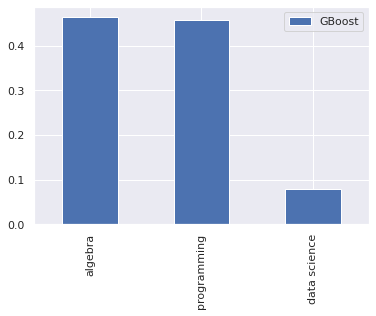

In [ ]:
features = {}
for feature, importance in zip(X_train_jd.columns, GBoost_model_jd.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"GBoost":features})
importances.sort_values("GBoost", ascending = False, inplace=True)
importances[:4].plot.bar();

Data scientist

In [ ]:
GBoost_model_ds = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =13).fit(X_train_ds,y_train_ds)

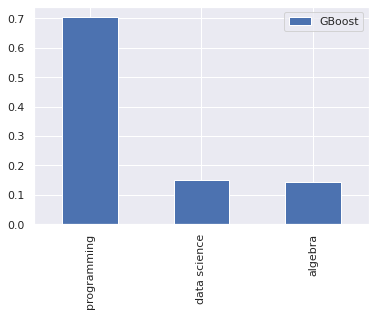

In [ ]:
features = {}
for feature, importance in zip(X_train_ds.columns, GBoost_model_ds.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"GBoost":features})
importances.sort_values("GBoost", ascending = False, inplace=True)
importances[:4].plot.bar();

Developer

In [ ]:
GBoost_model_d = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =13).fit(X_train_d,y_train_d)

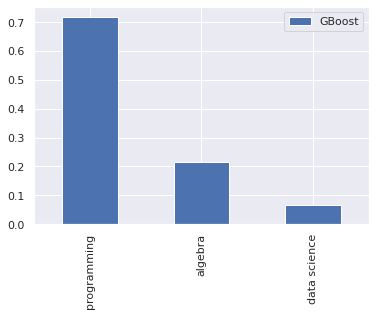

In [ ]:
features = {}
for feature, importance in zip(X_train_d.columns, GBoost_model_d.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"GBoost":features})
importances.sort_values("GBoost", ascending = False, inplace=True)
importances[:4].plot.bar();

Economist

In [ ]:
GBoost_model_e = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =13).fit(X_train_e,y_train_e)

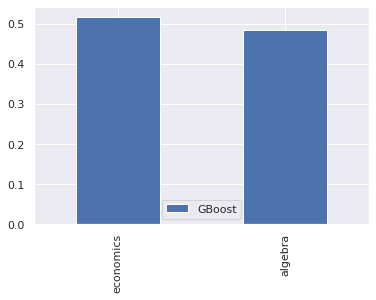

In [ ]:
features = {}
for feature, importance in zip(X_train_e.columns, GBoost_model_e.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"GBoost":features})
importances.sort_values("GBoost", ascending = False, inplace=True)
importances[:4].plot.bar();

Robotics engoneer

In [ ]:
GBoost_model_re = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =13).fit(X_train_re,y_train_re)

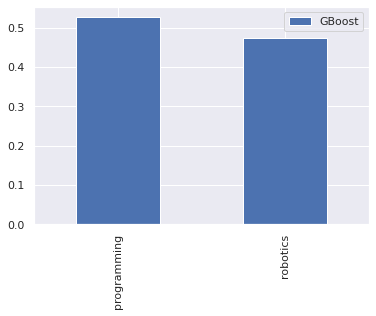

In [ ]:
features = {}
for feature, importance in zip(X_train_re.columns, GBoost_model_re.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"GBoost":features})
importances.sort_values("GBoost", ascending = False, inplace=True)
importances[:4].plot.bar();

Senior developer

In [ ]:
GBoost_model_sd = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =13).fit(X_train_sd,y_train_sd)

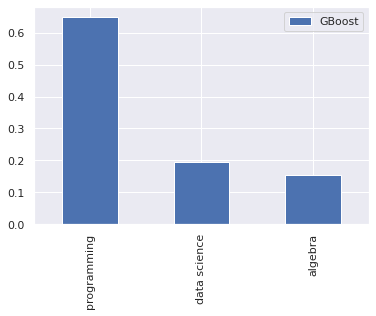

In [ ]:
features = {}
for feature, importance in zip(X_train_sd.columns, GBoost_model_sd.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"GBoost":features})
importances.sort_values("GBoost", ascending = False, inplace=True)
importances[:4].plot.bar();

Scores

In [ ]:
print("GBoost for Junior developer:")
print("train_score:", GBoost_model_jd.score(X_train_jd,y_train_jd))
print("test_score:", GBoost_model_jd.score(X_test_jd,y_test_jd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_jd),np.log(GBoost_model_jd.predict(X_train_jd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_jd),np.log(GBoost_model_jd.predict(X_test_jd)))))
print("------------------------------")
print("GBoost for Data scientist:")
print("train_score:", GBoost_model_ds.score(X_train_ds,y_train_ds))
print("test_score:", GBoost_model_ds.score(X_test_ds,y_test_ds))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_ds),np.log(GBoost_model_ds.predict(X_train_ds)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_ds),np.log(GBoost_model_ds.predict(X_test_ds)))))
print("------------------------------")
print("GBoost for Developer:")
print("train_score:", GBoost_model_d.score(X_train_d,y_train_d))
print("test_score:", GBoost_model_d.score(X_test_d,y_test_d))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_d),np.log(GBoost_model_d.predict(X_train_d)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_d),np.log(GBoost_model_d.predict(X_test_d)))))
print("------------------------------")
print("GBoost for Economist:")
print("train_score:", GBoost_model_e.score(X_train_e,y_train_e))
print("test_score:", GBoost_model_e.score(X_test_e,y_test_e))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_e),np.log(GBoost_model_e.predict(X_train_e)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_e),np.log(GBoost_model_e.predict(X_test_e)))))
print("------------------------------")
print("GBoost for Robotics engineer:")
print("train_score:", GBoost_model_re.score(X_train_re,y_train_re))
print("test_score:", GBoost_model_re.score(X_test_re,y_test_re))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_re),np.log(GBoost_model_re.predict(X_train_re)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_re),np.log(GBoost_model_re.predict(X_test_re)))))
print("------------------------------")
print("GBoost for Senior developer:")
print("train_score:", GBoost_model_sd.score(X_train_sd,y_train_sd))
print("test_score:", GBoost_model_sd.score(X_test_sd,y_test_sd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_sd),np.log(GBoost_model_sd.predict(X_train_sd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_sd),np.log(GBoost_model_sd.predict(X_test_sd)))))

GBoost for Junior developer:
train_score: 0.9066096105000492
test_score: 0.5934409697821065
train RMSE: 0.04795384059742376
test RMSE: 0.0976795425642739
------------------------------
GBoost for Data scientist:
train_score: 0.90662650345568
test_score: 0.5740486386298558
train RMSE: 0.046944974939793015
test RMSE: 0.1007341327518426
------------------------------
GBoost for Developer:
train_score: 0.9267061892294091
test_score: 0.6628070310386125
train RMSE: 0.04567812962317093
test RMSE: 0.09818271522806166
------------------------------
GBoost for Economist:
train_score: 0.7439184984271434
test_score: 0.4153475370212616
train RMSE: 0.06993070047130527
test RMSE: 0.10322866675654425
------------------------------
GBoost for Robotics engineer:
train_score: 0.756144566107626
test_score: 0.4685620879151604
train RMSE: 0.06855028605269747
test RMSE: 0.10196713492225642
------------------------------
GBoost for Senior developer:
train_score: 0.861665537308352
test_score: 0.417071763116678

## **LGBM**

Junior developer

In [ ]:
model_lgb_jd = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11).fit(X_train_jd,y_train_jd)

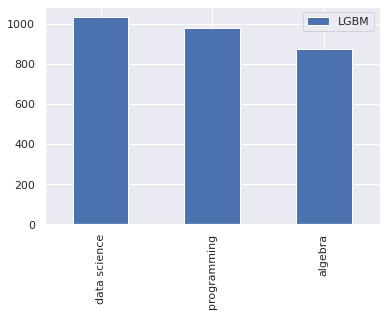

In [ ]:
features = {}
for feature, importance in zip(X_train_jd.columns, model_lgb_jd.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"LGBM":features})
importances.sort_values("LGBM", ascending = False, inplace=True)
importances[:4].plot.bar();

Data scientist

In [ ]:
model_lgb_ds = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11).fit(X_train_ds,y_train_ds)

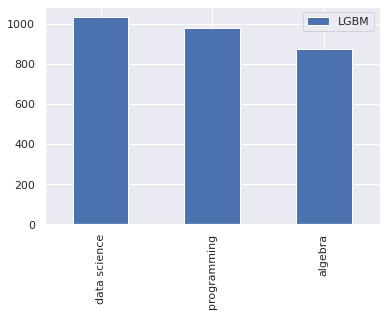

In [ ]:
features = {}
for feature, importance in zip(X_train_ds.columns, model_lgb_ds.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"LGBM":features})
importances.sort_values("LGBM", ascending = False, inplace=True)
importances[:4].plot.bar();

Developer

In [ ]:
model_lgb_d = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11).fit(X_train_d,y_train_d)

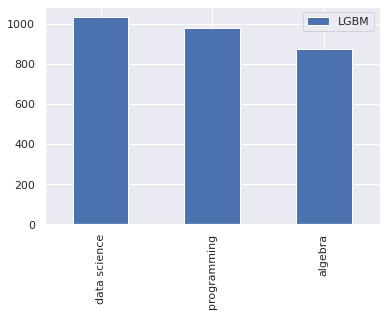

In [ ]:
features = {}
for feature, importance in zip(X_train_d.columns, model_lgb_d.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"LGBM":features})
importances.sort_values("LGBM", ascending = False, inplace=True)
importances[:4].plot.bar();

Economist

In [ ]:
model_lgb_e = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11).fit(X_train_e,y_train_e)

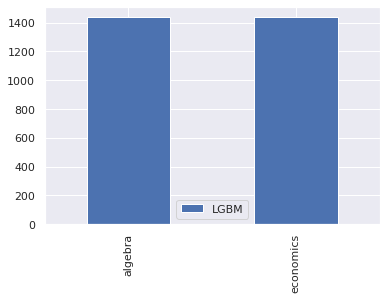

In [ ]:
features = {}
for feature, importance in zip(X_train_e.columns, model_lgb_e.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"LGBM":features})
importances.sort_values("LGBM", ascending = False, inplace=True)
importances[:4].plot.bar();

Robotics engineer

In [ ]:
model_lgb_re = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11).fit(X_train_re,y_train_re)

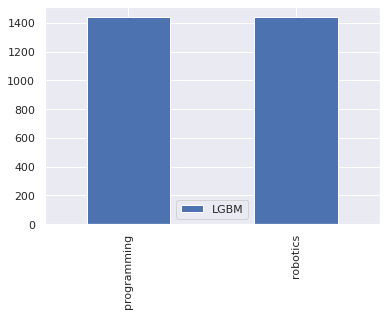

In [ ]:
features = {}
for feature, importance in zip(X_train_re.columns, model_lgb_re.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"LGBM":features})
importances.sort_values("LGBM", ascending = False, inplace=True)
importances[:4].plot.bar();

Senior developer

In [ ]:
model_lgb_sd = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11).fit(X_train_sd,y_train_sd)

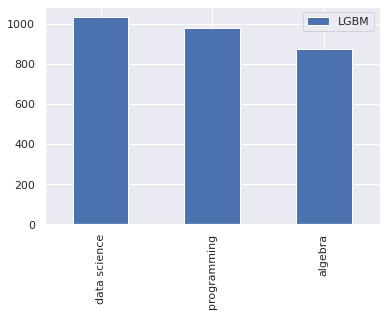

In [ ]:
features = {}
for feature, importance in zip(X_train_sd.columns, model_lgb_sd.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"LGBM":features})
importances.sort_values("LGBM", ascending = False, inplace=True)
importances[:4].plot.bar();

Scores

In [ ]:
print("LGBM for Junior developer:")
print("train_score:", model_lgb_jd.score(X_train_jd,y_train_jd))
print("test_score:", model_lgb_jd.score(X_test_jd,y_test_jd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_jd),np.log(model_lgb_jd.predict(X_train_jd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_jd),np.log(model_lgb_jd.predict(X_test_jd)))))
print("------------------------------")
print("LGBM for Data scientist:")
print("train_score:", model_lgb_ds.score(X_train_ds,y_train_ds))
print("test_score:", model_lgb_ds.score(X_test_ds,y_test_ds))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_ds),np.log(model_lgb_ds.predict(X_train_ds)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_ds),np.log(model_lgb_ds.predict(X_test_ds)))))
print("------------------------------")
print("LGBM for Developer:")
print("train_score:", model_lgb_d.score(X_train_d,y_train_d))
print("test_score:", model_lgb_d.score(X_test_d,y_test_d))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_d),np.log(model_lgb_d.predict(X_train_d)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_d),np.log(model_lgb_d.predict(X_test_d)))))
print("------------------------------")
print("LGBM for Economist:")
print("train_score:", model_lgb_e.score(X_train_e,y_train_e))
print("test_score:", model_lgb_e.score(X_test_e,y_test_e))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_e),np.log(model_lgb_e.predict(X_train_e)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_e),np.log(model_lgb_e.predict(X_test_e)))))
print("------------------------------")
print("LGBM for Robotics engineer:")
print("train_score:", model_lgb_re.score(X_train_re,y_train_re))
print("test_score:", model_lgb_re.score(X_test_re,y_test_re))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_re),np.log(model_lgb_re.predict(X_train_re)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_re),np.log(model_lgb_re.predict(X_test_re)))))
print("------------------------------")
print("LGBM for Senior developer:")
print("train_score:", model_lgb_sd.score(X_train_sd,y_train_sd))
print("test_score:", model_lgb_sd.score(X_test_sd,y_test_sd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_sd),np.log(model_lgb_sd.predict(X_train_sd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_sd),np.log(model_lgb_sd.predict(X_test_sd)))))

LGBM for Junior developer:
train_score: 0.7418356078295038
test_score: 0.6774571437284005
train RMSE: 0.07956656731774525
test RMSE: 0.08725310905280764
------------------------------
LGBM for Data scientist:
train_score: 0.7355296956472326
test_score: 0.6759310499766785
train RMSE: 0.07884859823454103
test RMSE: 0.08855884949891255
------------------------------
LGBM for Developer:
train_score: 0.7851097325174388
test_score: 0.7212462885322393
train RMSE: 0.07747870780757157
test RMSE: 0.08916470294875058
------------------------------
LGBM for Economist:
train_score: 0.5949848545115327
test_score: 0.5209560777996503
train RMSE: 0.08756387812700345
test RMSE: 0.09346363927047996
------------------------------
LGBM for Robotics engineer:
train_score: 0.609695395373608
test_score: 0.5313101519090976
train RMSE: 0.08592139662760838
test RMSE: 0.09700845529698941
------------------------------
LGBM for Senior developer:
train_score: 0.6228526839660934
test_score: 0.5528247667800106
train 

## **KRR model**

Junior developer

In [ ]:
KRR_model_jd = KernelRidge(alpha=0.1, coef0=2.5, degree=2, kernel='polynomial').fit(X_train_jd,y_train_jd)

Data scientist

In [ ]:
KRR_model_ds = KernelRidge(alpha=0.1, coef0=2.5, degree=2, kernel='polynomial').fit(X_train_ds,y_train_ds)

Developer

In [ ]:
KRR_model_d = KernelRidge(alpha=0.1, coef0=2.5, degree=2, kernel='polynomial').fit(X_train_d,y_train_d)

Economist

In [ ]:
KRR_model_e = KernelRidge(alpha=0.1, coef0=2.5, degree=2, kernel='polynomial').fit(X_train_e,y_train_e)

Robotics engineer

In [ ]:
KRR_model_re = KernelRidge(alpha=0.1, coef0=2.5, degree=2, kernel='polynomial').fit(X_train_re,y_train_re)

Senior developer

In [ ]:
KRR_model_sd = KernelRidge(alpha=0.1, coef0=2.5, degree=2, kernel='polynomial').fit(X_train_sd,y_train_sd)

Scores

In [ ]:
print("KRR for Junior developer:")
print("train_score:", KRR_model_jd.score(X_train_jd,y_train_jd))
print("test_score:", KRR_model_jd.score(X_test_jd,y_test_jd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_jd),np.log(KRR_model_jd.predict(X_train_jd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_jd),np.log(KRR_model_jd.predict(X_test_jd)))))
print("------------------------------")
print("KRR for Data scientist:")
print("train_score:", KRR_model_ds.score(X_train_ds,y_train_ds))
print("test_score:", KRR_model_ds.score(X_test_ds,y_test_ds))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_ds),np.log(KRR_model_ds.predict(X_train_ds)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_ds),np.log(KRR_model_ds.predict(X_test_ds)))))
print("------------------------------")
print("KRR for Developer:")
print("train_score:", KRR_model_d.score(X_train_d,y_train_d))
print("test_score:", KRR_model_d.score(X_test_d,y_test_d))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_d),np.log(KRR_model_d.predict(X_train_d)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_d),np.log(KRR_model_d.predict(X_test_d)))))
print("------------------------------")
print("KRR for Economist:")
print("train_score:", KRR_model_e.score(X_train_e,y_train_e))
print("test_score:", KRR_model_e.score(X_test_e,y_test_e))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_e),np.log(KRR_model_e.predict(X_train_e)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_e),np.log(KRR_model_e.predict(X_test_e)))))
print("------------------------------")
print("KRR for Robotics engineer:")
print("train_score:", KRR_model_re.score(X_train_re,y_train_re))
print("test_score:", KRR_model_re.score(X_test_re,y_test_re))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_re),np.log(KRR_model_re.predict(X_train_re)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_re),np.log(KRR_model_re.predict(X_test_re)))))
print("------------------------------")
print("KRR for Senior developer:")
print("train_score:", KRR_model_sd.score(X_train_sd,y_train_sd))
print("test_score:", KRR_model_sd.score(X_test_sd,y_test_sd))
print("train RMSE:", np.sqrt(mean_squared_error(np.log(y_train_sd),np.log(KRR_model_sd.predict(X_train_sd)))))
print("test RMSE:", np.sqrt(mean_squared_error(np.log(y_test_sd),np.log(KRR_model_sd.predict(X_test_sd)))))

KRR for Junior developer:
train_score: 0.7065540574347039
test_score: 0.698072043827596
train RMSE: 0.08482734767741124
test RMSE: 0.08461209868992124
------------------------------
KRR for Data scientist:
train_score: 0.6972849784719244
test_score: 0.7037265159060297
train RMSE: 0.08383469437829406
test RMSE: 0.0842924604534169
------------------------------
KRR for Developer:
train_score: 0.7553087740109377
test_score: 0.7535891402430372
train RMSE: 0.0823028466543137
test RMSE: 0.08379213350509994
------------------------------
KRR for Economist:
train_score: 0.5637363568355916
test_score: 0.5483668167809952
train RMSE: 0.09068649135912418
test RMSE: 0.09076877073284555
------------------------------
KRR for Robotics engineer:
train_score: 0.5731319124668693
test_score: 0.5701142751013185
train RMSE: 0.08970940124386007
test RMSE: 0.09285496254469383
------------------------------
KRR for Senior developer:
train_score: 0.5724520938344408
test_score: 0.6088018533949676
train RMSE: 0.

# ***DataFrame for predict***

In [ ]:
predict = predict.join(pd.get_dummies(predict['job']))
predict = predict.drop('job',axis = 1)

In [ ]:
predict.head()

,Id,algebra,programming,data science,robotics,economics,salary,data scientist,developer,economist,junior developer,robotics engineer,senior developer
0,9000,73,59,57,54,61,0,0,0,0,0,1,0
1,9001,77,80,53,93,80,0,0,0,0,0,0,1
2,9002,95,72,88,63,84,0,0,1,0,0,0,0
3,9003,83,88,97,75,50,0,0,0,0,0,1,0
4,9004,52,85,92,87,62,0,0,0,0,1,0,0


In [ ]:
predict_jd = predict[predict['junior developer'] == 1]
Ids_jd = predict_jd.Id.to_list()
predict_jd = predict_jd.drop(['economics', 'robotics','data scientist','developer','economist','robotics engineer','senior developer','Id','salary','junior developer'], axis=1)

In [ ]:
predict_jd.head()

,algebra,programming,data science
4,52,85,92
6,56,50,76
7,93,51,56
10,56,90,93
16,68,77,87


In [ ]:
predict_ds = predict[predict['data scientist'] == 1]
Ids_ds = predict_ds.Id.to_list()
predict_ds = predict_ds.drop(['economics', 'robotics','junior developer','developer','economist','robotics engineer','senior developer','Id','salary','data scientist'], axis=1)

In [ ]:
predict_ds.head()

,algebra,programming,data science
12,91,79,97
21,86,68,61
25,62,91,52
29,82,86,69
30,92,87,73


In [ ]:
predict_d = predict[predict['developer'] == 1]
Ids_d = predict_d.Id.to_list()
predict_d = predict_d.drop(['economics', 'robotics','junior developer','data scientist','economist','robotics engineer','senior developer','Id','salary','developer'], axis=1)

In [ ]:
predict_d.head()

,algebra,programming,data science
2,95,72,88
18,81,98,99
20,96,73,73
35,53,73,57
37,79,88,78


In [ ]:
predict_e = predict[predict['economist'] == 1]
Ids_e = predict_e.Id.to_list()
predict_e = predict_e.drop(['programming', 'data science','robotics','data scientist','developer','junior developer','robotics engineer','senior developer','Id','salary','economist'], axis=1)

In [ ]:
predict_e.head()

,algebra,economics
8,79,66
17,78,84
22,74,88
34,69,57
38,59,96


In [ ]:
predict_re = predict[predict['robotics engineer'] == 1]
Ids_re = predict_re.Id.to_list()
predict_re = predict_re.drop(['algebra', 'data science','economics','data scientist','developer','junior developer','economist','senior developer','Id','salary','robotics engineer'], axis=1)

In [ ]:
predict_re.head()

,programming,robotics
0,59,54
3,88,75
11,77,69
13,91,52
14,72,75


In [ ]:
predict_sd = predict[predict['senior developer'] == 1]
Ids_sd = predict_sd.Id.to_list()
predict_sd = predict_sd.drop(['economics', 'robotics','data scientist','developer','economist','robotics engineer','junior developer','Id','salary','senior developer'], axis=1)

In [ ]:
predict_jd.head()

,algebra,programming,data science
4,52,85,92
6,56,50,76
7,93,51,56
10,56,90,93
16,68,77,87


In [ ]:
%%time
y_predict_jd = RF_model_jd.predict(predict_jd)
y_predict_ds = RF_model_ds.predict(predict_ds)
y_predict_d = RF_model_d.predict(predict_d)
y_predict_e = RF_model_e.predict(predict_e)
y_predict_re = RF_model_re.predict(predict_re)
y_predict_sd = RF_model_sd.predict(predict_sd)

CPU times: user 742 ms, sys: 187 ms, total: 929 ms
Wall time: 1.22 s


In [ ]:
output_jd = pd.DataFrame({"Id": Ids_jd, "salary": y_predict_jd})
output_ds = pd.DataFrame({"Id": Ids_ds, "salary": y_predict_ds})
output_d = pd.DataFrame({"Id": Ids_d, "salary": y_predict_d})
output_e = pd.DataFrame({"Id": Ids_e, "salary": y_predict_e})
output_re = pd.DataFrame({"Id": Ids_re, "salary": y_predict_re})
output_sd = pd.DataFrame({"Id": Ids_sd, "salary": y_predict_sd})

In [ ]:
output=output_jd.append([output_ds,output_d,output_e,output_re,output_sd], ignore_index = True)

In [ ]:
output=output.sort_values(by=['Id'])
output

,Id,salary
673,9000,763419.000000
836,9001,540080.000000
351,9002,342820.000000
674,9003,925436.666667
0,9004,151300.000000
...,...,...
172,9995,178240.000000
672,9996,382889.333333
507,9997,327680.000000
173,9998,140260.000000


In [ ]:
output = output.astype(int)
output

,Id,salary
673,9000,763419
836,9001,540080
351,9002,342820
674,9003,925436
0,9004,151300
...,...,...
172,9995,178240
672,9996,382889
507,9997,327680
173,9998,140260
